In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)
navegador.maximize_window()

In [12]:
navegador.get('https://www.cepea.esalq.usp.br/br/indicador/milho.aspx')

In [28]:
table_element = navegador.find_element(By.XPATH,'//*[@id="imagenet-content"]/div[2]/div[2]/div[1]/div[2]/div[1]').text


In [92]:
navegador.quit()

In [29]:
table_element

'  VALOR R$* VAR./DIA VAR./MÊS VALOR US$*\n12/01/2024 67,24 -1,12% -2,85% 13,85\n11/01/2024 68,00 -1,88% -1,75% 13,94\n10/01/2024 69,30 -1,34% 0,13% 14,16\n09/01/2024 70,24 0,17% 1,49% 14,33\n08/01/2024 70,12 -0,50% 1,31% 14,39'

In [31]:
tabela = table_element.split()

In [40]:
df = pd.DataFrame(tabela)
df.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,VALOR,R$*,VAR./DIA,VAR./MÊS,VALOR,US$*,12/01/2024,"67,24","-1,12%","-2,85%",...,09/01/2024,"70,24","0,17%","1,49%","14,33",08/01/2024,"70,12","-0,50%","1,31%","14,39"


In [77]:
cabecalho = df[0:6].T
cabecalho

,0,1,2,3,4,5
0,VALOR,R$*,VAR./DIA,VAR./MÊS,VALOR,US$*


In [78]:
cabecalho.rename(columns={0:'DATA',
                          1:'VALOR R$*',
                          2:'VAR./DIA',
                          3:'VAR./MÊS',
                          4:'VALOR US$*'},inplace=True)

In [80]:
cabecalho.drop(labels=[5],axis=1,inplace=True)

In [81]:
linha_dia = df[6:11].T

In [82]:
linha_dia

,6,7,8,9,10
0,12/01/2024,"67,24","-1,12%","-2,85%","13,85"


In [83]:
linha_dia.columns = cabecalho.columns

In [84]:
linha_dia

,DATA,VALOR R$*,VAR./DIA,VAR./MÊS,VALOR US$*
0,12/01/2024,"67,24","-1,12%","-2,85%","13,85"


In [87]:
# linha_dia.to_excel('milhos.xlsx',index=False)

In [88]:
base = pd.read_excel('milhos.xlsx')
base

,DATA,VALOR R$*,VAR./DIA,VAR./MÊS,VALOR US$*
0,12/01/2024,"67,24","-1,12%","-2,85%","13,85"


In [89]:
base_add = pd.concat([base,linha_dia])

In [94]:
base_add.drop_duplicates(inplace=True)

In [95]:
base_add.to_excel('milhos.xlsx',index=False)

# Hortifrutis cepea banco de dados

In [6]:
navegador.get('https://www.hfbrasil.org.br/br/banco-de-dados-precos-medios-dos-hortifruticolas.aspx')

In [7]:
time.sleep(1)
navegador.find_element(By.XPATH,'//*[@id="produto-4"]').click()

time.sleep(5)
navegador.find_element(By.XPATH,'//*[@id="frm-busca-avancada"]/div/div/div[2]/div[3]/label').click()

time.sleep(5)
navegador.find_element(By.XPATH,'//*[@id="frm-busca-avancada"]/div/div/div[3]/div[2]/label').click()

time.sleep(5)
navegador.find_element(By.XPATH,'//*[@id="frm-busca-avancada"]/div/div/div[3]/div[7]/button').click()


time.sleep(5)
navegador.find_element(By.XPATH,'//*[@id="frm-busca-avancada"]/div/div/div[3]/div[7]/a[2]/img').click()

In [ ]:
import os
import fnmatch

def get_files_by_name_part(folder_path, name_part):
    matching_files = []
    
    # Walk through the folder and its subdirectories
    for root, dirs, files in os.walk(folder_path):
        for file_name in fnmatch.filter(files, f"*{name_part}*"):
            # Check if the file name contains the specified part
            matching_files.append(os.path.join(root, file_name))
    
    return matching_files

# Example usage
folder_path = 'C:/Users/braul/Downloads'  # Replace with the actual folder path
name_part = 'precos-medios'  # Replace with the part of the name you're looking for

result = get_files_by_name_part(folder_path, name_part)

# Print the matching files
for file_path in result:
    print(file_path)

In [12]:
df = pd.read_excel(file_path)

In [13]:
df.dropna(axis=0,inplace=True)
df

,Produto,Região,Dia,Mês,Ano,Moeda,Unidade,Preço
0,Nanica primeira - atacado,São Paulo (capital),12.0,1.0,2024.0,R$,caixa de 22 Kg,60.67
1,Nanica primeira - produtor,Bom Jesus da Lapa,12.0,1.0,2024.0,R$,quilograma,2.40
2,Nanica primeira - produtor,Norte de Minas Gerais,12.0,1.0,2024.0,R$,quilograma,2.17
3,Nanica primeira - produtor,Norte de Santa Catarina,12.0,1.0,2024.0,R$,quilograma,0.96
4,Nanica primeira - produtor,Vale do Ribeira,12.0,1.0,2024.0,R$,quilograma,1.98
5,Prata anã primeira - atacado,São Paulo (capital),12.0,1.0,2024.0,R$,Caixa 20 Kg,130.00
6,Prata anã primeira - produtor,Bom Jesus da Lapa,12.0,1.0,2024.0,R$,quilograma,5.46
7,Prata anã primeira - produtor,Delfinópolis,12.0,1.0,2024.0,R$,quilograma,5.53
8,Prata anã primeira - produtor,Linhares,12.0,1.0,2024.0,R$,quilograma,5.26
9,Prata anã primeira - produtor,Norte de Minas Gerais,12.0,1.0,2024.0,R$,quilograma,5.50


In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)
navegador.maximize_window()

In [15]:
navegador.get('https://www.hfbrasil.org.br/br/estatistica/banana.aspx')

In [16]:
table_element  = navegador.find_element(By.XPATH,'//*[@id="imagenet-conteudo"]/div/div[2]/div[1]/div[4]/table').text

In [129]:
tabela = table_element.split('\n')
tabela

['Produto Região Unidade 15/dez 22/dez 05/jan 12/jan',
 'Nanica primeira - atacado São Paulo (capital) caixa de 22 Kg 61,50 65,75 67,25 60,67',
 'Nanica primeira - produtor Bom Jesus da Lapa quilograma 2,21 2,36 2,42 2,40',
 'Nanica primeira - produtor Linhares quilograma - - - 2,27 2,15 - - -',
 'Nanica primeira - produtor Norte de Minas Gerais quilograma 2,26 2,40 2,38 2,17',
 'Nanica primeira - produtor Norte de Santa Catarina quilograma 1,33 1,14 1,07 0,96']

In [109]:
tabela[0].split(' ')

['Produto', 'Região', 'Unidade', '15/dez', '22/dez', '05/jan', '12/jan']

In [189]:
tabela[1] = tabela[1].replace('atacado ','atacado/').replace('(capital) ','(capital)/').replace('Kg ','Kg/').replace('0 ','0/').replace('1 ','1/').replace('2 ','2/').replace('3 ','3/').replace('4 ','4/').replace('5 ','5/').replace('6 ','6/').replace('6 ','6/').replace('7 ','7/').replace('8 ','8/').replace('9 ','9/')
tabela[1]= tabela[1].split('/')


In [190]:
tabela[1]

['Nanica primeira - atacado',
 'São Paulo (capital)',
 'caixa de 22',
 'Kg',
 '61,50',
 '65,75',
 '67,25',
 '60,67']

In [191]:
df = pd.DataFrame(tabela[1])

In [136]:
df.T

,0,1,2,3,4,5,6,7
0,Nanica primeira - atacado,São Paulo (capital),caixa de 22,Kg,"61,50","65,75","67,25","60,67"


In [150]:
tabela = table_element.split('\n')
tabela

['Produto Região Unidade 15/dez 22/dez 05/jan 12/jan',
 'Nanica primeira - atacado São Paulo (capital) caixa de 22 Kg 61,50 65,75 67,25 60,67',
 'Nanica primeira - produtor Bom Jesus da Lapa quilograma 2,21 2,36 2,42 2,40',
 'Nanica primeira - produtor Linhares quilograma - - - 2,27 2,15 - - -',
 'Nanica primeira - produtor Norte de Minas Gerais quilograma 2,26 2,40 2,38 2,17',
 'Nanica primeira - produtor Norte de Santa Catarina quilograma 1,33 1,14 1,07 0,96']

In [157]:
tabela[2] = tabela[2].replace('produtor ','produtor/').replace('Lapa ','Lapa/').replace('quilograma ','quilograma/').replace('0 ','0/').replace('1 ','1/').replace('2 ','2/').replace('3 ','3/').replace('4 ','4/').replace('5 ','5/').replace('6 ','6/').replace('6 ','6/').replace('7 ','7/').replace('8 ','8/').replace('9 ','9/')
tabela[2]= tabela[2].split('/')

In [ ]:
tabela[2]= tabela[2].split('/')

In [159]:
tabela[2]

['Nanica primeira - produtor',
 'Bom Jesus da Lapa',
 'quilograma',
 '2,21',
 '2,36',
 '2,42',
 '2,40']

In [162]:
tabela[3] = tabela[3].replace('produtor ','produtor/').replace('Linhares ','Linhares/').replace('quilograma ','quilograma/').replace('0 ','0/').replace('1 ','1/').replace('2 ','2/').replace('3 ','3/').replace('4 ','4/').replace('5 ','5/').replace('6 ','6/').replace('6 ','6/').replace('7 ','7/').replace('8 ','8/').replace('9 ','9/').replace('- - - ','- - -/')
tabela[3]= tabela[3].split('/')

In [163]:
tabela[3]

['Nanica primeira - produtor',
 'Linhares',
 'quilograma',
 '- - -',
 '2,27',
 '2,15',
 '- - -']

In [151]:
tabela[4] = tabela[4].replace('produtor ','produtor/').replace('Gerais ','Gerais/').replace('quilograma ','quilograma/').replace('0 ','0/').replace('1 ','1/').replace('2 ','2/').replace('3 ','3/').replace('4 ','4/').replace('5 ','5/').replace('6 ','6/').replace('6 ','6/').replace('7 ','7/').replace('8 ','8/').replace('9 ','9/').replace('- - - ','- - -/')
tabela[4]= tabela[4].split('/')

In [152]:
tabela[4]

['Nanica primeira - produtor',
 'Norte de Minas Gerais',
 'quilograma',
 '2,26',
 '2,40',
 '2,38',
 '2,17']

In [153]:

tabela[5] = tabela[5].replace('produtor ','produtor/').replace('Catarina ','Catarina/').replace('quilograma ','quilograma/').replace('0 ','0/').replace('1 ','1/').replace('2 ','2/').replace('3 ','3/').replace('4 ','4/').replace('5 ','5/').replace('6 ','6/').replace('6 ','6/').replace('7 ','7/').replace('8 ','8/').replace('9 ','9/').replace('- - - ','- - -/')
tabela[5]= tabela[5].split('/')
tabela[5]

['Nanica primeira - produtor',
 'Norte de Santa Catarina',
 'quilograma',
 '1,33',
 '1,14',
 '1,07',
 '0,96']

In [160]:
df1 = pd.DataFrame(tabela[2])

In [181]:
df1 = pd.DataFrame(tabela[2])
df2 = pd.DataFrame(tabela[3])
df3 = pd.DataFrame(tabela[4])
df4 = pd.DataFrame(tabela[5])

In [192]:
df.loc[df[0] == 'caixa de 22', 0]= 'caixa de 22 Kg'

In [193]:
df = df.loc[df[0]!= 'Kg']

In [174]:
tabela[0] = tabela[0].split()

In [194]:
df.reset_index(inplace=True)
df

,index,0
0,0,Nanica primeira - atacado
1,1,São Paulo (capital)
2,2,caixa de 22 Kg
3,4,"61,50"
4,5,"65,75"
5,6,"67,25"
6,7,"60,67"


In [195]:
df.drop(['index'],axis=1,inplace=True)

In [196]:
df

,0
0,Nanica primeira - atacado
1,São Paulo (capital)
2,caixa de 22 Kg
3,"61,50"
4,"65,75"
5,"67,25"
6,"60,67"


In [197]:
df_final = pd.concat([df.T,df1.T,df2.T,df3.T,df4.T])
df_final

,0,1,2,3,4,5,6
0,Nanica primeira - atacado,São Paulo (capital),caixa de 22 Kg,"61,50","65,75","67,25","60,67"
0,Nanica primeira - produtor,Bom Jesus da Lapa,quilograma,"2,21","2,36","2,42","2,40"
0,Nanica primeira - produtor,Linhares,quilograma,- - -,"2,27","2,15",- - -
0,Nanica primeira - produtor,Norte de Minas Gerais,quilograma,"2,26","2,40","2,38","2,17"
0,Nanica primeira - produtor,Norte de Santa Catarina,quilograma,"1,33","1,14","1,07","0,96"


In [198]:
tabela[0]

['Produto', 'Região', 'Unidade', '15/dez', '22/dez', '05/jan', '12/jan']

In [199]:
df_final.columns = tabela[0]

In [200]:
df_final

,Produto,Região,Unidade,15/dez,22/dez,05/jan,12/jan
0,Nanica primeira - atacado,São Paulo (capital),caixa de 22 Kg,"61,50","65,75","67,25","60,67"
0,Nanica primeira - produtor,Bom Jesus da Lapa,quilograma,"2,21","2,36","2,42","2,40"
0,Nanica primeira - produtor,Linhares,quilograma,- - -,"2,27","2,15",- - -
0,Nanica primeira - produtor,Norte de Minas Gerais,quilograma,"2,26","2,40","2,38","2,17"
0,Nanica primeira - produtor,Norte de Santa Catarina,quilograma,"1,33","1,14","1,07","0,96"


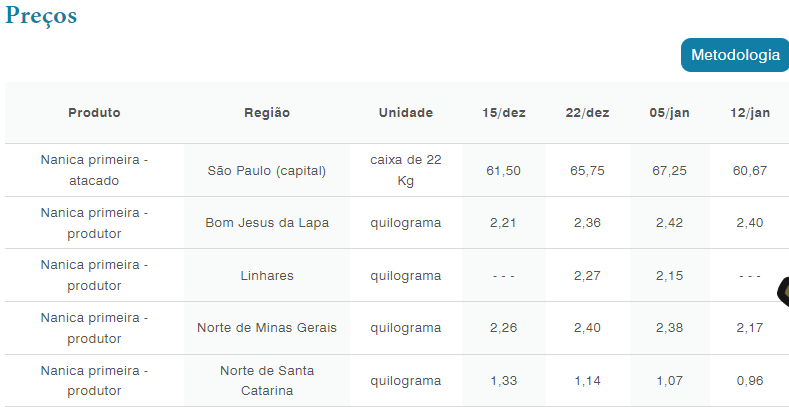